In [1]:
import numpy as np
import pandas as pd 

import os
import matplotlib.pylab as plt
from IPython.core.pylabtools import figsize

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers.normalization import *
from keras.layers.convolutional import SeparableConv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout, SpatialDropout2D
from keras.layers.core import Dense
from keras import backend as K
%matplotlib inline

In [2]:
#for pictues
# load images of shape (5547, 50, 50, 3)
X = np.load('X.npy') 
print(X)


# load labels of shape (5547,1); (0 = no cancer, 1 = cancer)
Y = np.load('Y.npy') 
print(Y[:5])


# shuffle data
perm_array = np.arange(len(X))
np.random.shuffle(perm_array)
X = X[perm_array]
Y = Y[perm_array]

print('X-images.shape =', X.shape, ', Y-images.shape =', Y.shape)


[[[[226 164 206]
   [224 154 196]
   [225 175 211]
   ...
   [240 221 237]
   [232 184 214]
   [243 213 235]]

  [[217 142 188]
   [221 130 179]
   [224 150 196]
   ...
   [227 170 204]
   [229 180 215]
   [236 212 232]]

  [[237 178 212]
   [229 157 199]
   [218 125 175]
   ...
   [221 184 217]
   [190 153 193]
   [227 164 208]]

  ...

  [[217 145 192]
   [214 129 184]
   [212 129 183]
   ...
   [194 122 185]
   [204 143 193]
   [189 129 188]]

  [[218 144 192]
   [213 128 185]
   [208 121 171]
   ...
   [136  79 145]
   [184 111 174]
   [188 112 176]]

  [[212 125 181]
   [211 136 181]
   [220 162 206]
   ...
   [127  90 152]
   [213 167 202]
   [215 180 211]]]


 [[[219 150 197]
   [217 158 201]
   [228 173 205]
   ...
   [198 165 199]
   [230 204 224]
   [231 193 221]]

  [[223 150 195]
   [222 140 192]
   [213 133 186]
   ...
   [218 143 193]
   [218 148 197]
   [215 131 185]]

  [[203 125 176]
   [218 143 192]
   [227 163 199]
   ...
   [210 137 188]
   [203 121 177]
   [192 124

In [3]:
#labels are equally distributed
print('There are', len(X[Y==0]), 'negative examples. There are', len(X[Y==1]), 'positive examples')

There are 2759 negative examples. There are 2788 positive examples


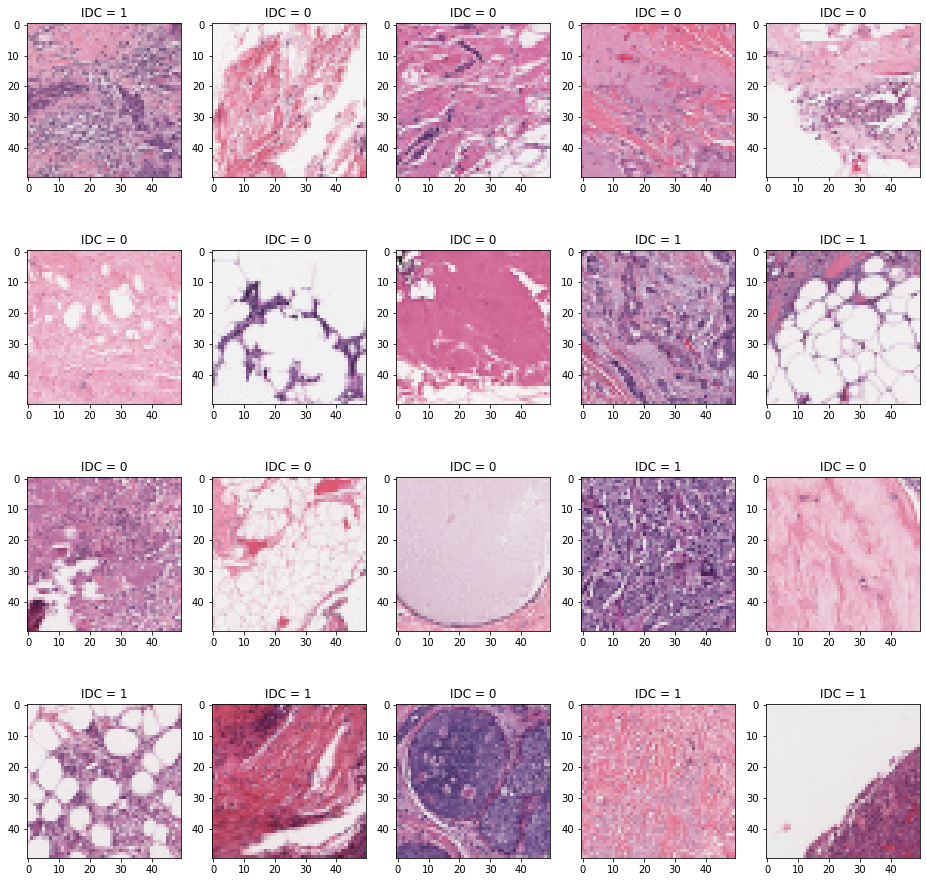

In [4]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title('IDC = %d'%Y[i])
    plt.imshow(X[i])

In [5]:
#normalization
X=X/255.0


#making data in 1D for ML algorithms, we take the length of X as first parameter and multiply the rest
X_reshaped = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X_reshaped.shape)

#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y, test_size=0.2)
print('Train size:', X_train.shape,'Test size:', X_test.shape)

(5547, 7500)
Train size: (4437, 7500) Test size: (1110, 7500)


In [6]:
def fit_and_evaluate(model):
    
    
    model.fit(X_train, Y_train)    # Train the model
    
   
    model_pred = model.predict(X_test)               # Make predictions and evalute
    model_accuracy = accuracy_score(Y_test, model_pred)
    
    
    return model_accuracy

In [7]:

DTR = DecisionTreeClassifier(random_state=42)
DTR_accuracy = fit_and_evaluate(DTR)                        #Decision Tree Classifier
print('DTR accuracy:', DTR_accuracy)



DTR accuracy: 0.6756756756756757


In [8]:

RFC = RandomForestClassifier(random_state=42)
RFC_accuracy = fit_and_evaluate(RFC)                      #Random Forest Classifier
print('RFC accuracy:', RFC_accuracy)



RFC accuracy: 0.7738738738738739


In [9]:
#KNN
KNN = KNeighborsClassifier(10)
KNN_accuracy = fit_and_evaluate(KNN)
print('KNN accuracy:', KNN_accuracy)



KNN accuracy: 0.7198198198198198


In [10]:

XGB = XGBClassifier(random_state=42)
XGB_accuracy = fit_and_evaluate(XGB)                   #XGBoost Classifier
print('XGB accuracy:',XGB_accuracy)

C:\Users\kagop\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy: 0.7882882882882883


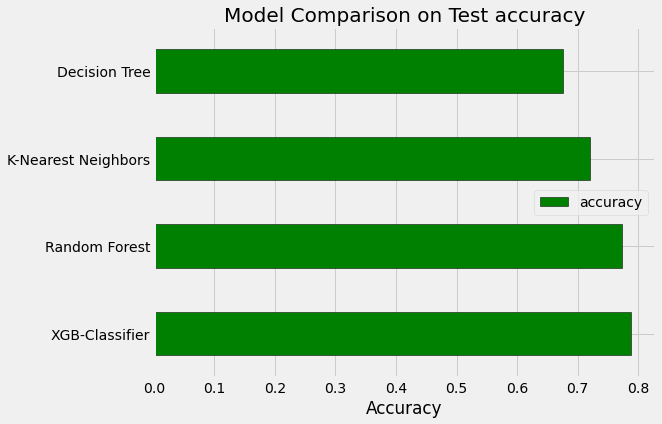

In [11]:
plt.style.use('fivethirtyeight')
figsize(8, 6)


model_comparison = pd.DataFrame({'model': 
                    ['Decision Tree', 'Random Forest',
                    'K-Nearest Neighbors', 'XGB-Classifier'],
                    'accuracy': [DTR_accuracy, RFC_accuracy, 
                             KNN_accuracy, XGB_accuracy]})


model_comparison.sort_values('accuracy', 
                     ascending = False).plot(x = 'model', 
                     y = 'accuracy', kind = 'barh',
                     color = 'green', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); 
plt.xlabel('Accuracy'); plt.xticks(size = 14)
plt.title('Model Comparison on Test accuracy', size = 20);

In [12]:

#splitting the data in 4D into train and test sets
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#changing y-sets to categorical
Y_train = to_categorical(Y_train,2)
Y_test = to_categorical(Y_test,2)

In [13]:
import tensorflow as tf




tf.keras.backend.clear_session()
K.clear_session() #clear session to make sure there is no overtraining
tf.random.set_seed(51)
np.random.seed(51)

input_shape = (X_train.shape[1], X_train.shape[2], 3)
batch_size = 64
num_classes = 2
epochs = 25
channelDim=-1
INIT_LR=1e-2 #initial learning rate

model = tf.keras.Sequential()

#first layer
model.add(SeparableConv2D(32, (3,3), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.2))

#second
model.add(SeparableConv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(SpatialDropout2D(0.3))

#third
model.add(SeparableConv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=channelDim))

#fourth
model.add(SeparableConv2D(256, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

#fifth
model.add(SeparableConv2D(256, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

#sixth
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation("softmax"))


opt=tf.keras.optimizers.Adagrad(learning_rate=INIT_LR,decay=INIT_LR/epochs)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=150)

Epoch 1/150
139/139 [==============================] - 23s 147ms/step - loss: 0.7958 - accuracy: 0.6827
Epoch 2/150
139/139 [==============================] - 20s 144ms/step - loss: 0.6304 - accuracy: 0.7111
Epoch 3/150
139/139 [==============================] - 20s 143ms/step - loss: 0.5815 - accuracy: 0.7419
Epoch 4/150
139/139 [==============================] - 20s 142ms/step - loss: 0.5406 - accuracy: 0.7537
Epoch 5/150
139/139 [==============================] - 20s 145ms/step - loss: 0.5361 - accuracy: 0.7514
Epoch 6/150
139/139 [==============================] - 20s 146ms/step - loss: 0.5169 - accuracy: 0.7658
Epoch 7/150
139/139 [==============================] - 20s 146ms/step - loss: 0.5017 - accuracy: 0.7620
Epoch 8/150
139/139 [==============================] - 20s 143ms/step - loss: 0.4868 - accuracy: 0.7816
Epoch 9/150
139/139 [==============================] - 20s 145ms/step - loss: 0.4841 - accuracy: 0.7785
Epoch 10/150
139/139 [==============================] - 15s 110m

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
Y_test[:5]